## Projeto Final da Diciplina Aprendizagem de Maquina


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
import sys
from sklearn import model_selection

from sklearn.preprocessing import MinMaxScaler

from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

In [ ]:
sns.set_style('whitegrid')

In [ ]:
heart = pd.read_csv("heart.csv")

In [ ]:
heart_df = pd.DataFrame(heart)
heart_df["ChestPainType"] = heart_df['ChestPainType'].replace("ATA",0).replace("NAP",1).replace("ASY",2).replace("TA",3)
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,0,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,1,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,0,130,283,0,ST,98,N,0.0,Up,0
3,48,F,2,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,1,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,3,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,2,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,2,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,0,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
heart_df.shape

(918, 12)

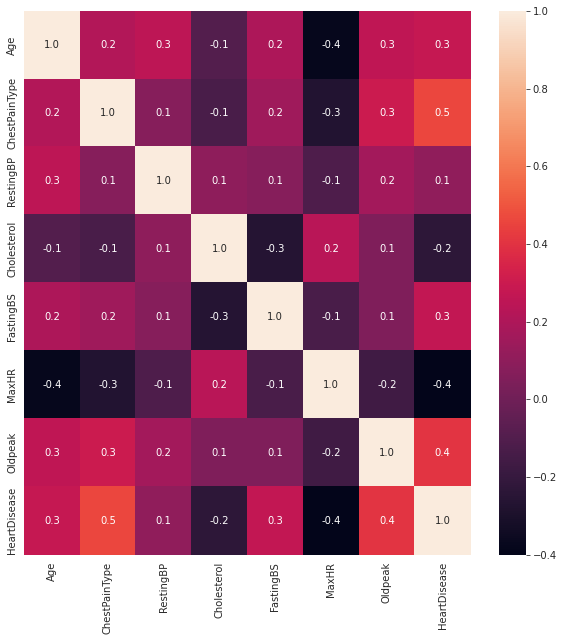

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(heart_df.corr(), annot=True, fmt='.1f')
plt.show()

In [ ]:
X = heart_df[["Age","ChestPainType","RestingBP" ,"Cholesterol", "Oldpeak"]].values
y = heart_df['HeartDisease']

Features = ["Age","ChestPainType","RestingBP" ,"Cholesterol", "Oldpeak"]
Outcome = ['HeartDisease']


mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape

(734, 5)

## Decision Tree

In [ ]:
clf = DecisionTreeClassifier()

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
print('Ein: %0.4f' % (1 - accuracy_score(y_train, clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf.predict(X_test))))
print(classification_report(y_test, clf.predict(X_test)))

Ein: 0.0000
Eout: 0.3804
              precision    recall  f1-score   support

           0       0.55      0.71      0.62        80
           1       0.71      0.55      0.62       104

    accuracy                           0.62       184
   macro avg       0.63      0.63      0.62       184
weighted avg       0.64      0.62      0.62       184



Age:0.1303444832306219
ChestPainType:0.2956147576694256
RestingBP:0.14289270750218028
Cholesterol:0.28067577550016654
Oldpeak:0.1504722760976058


<BarContainer object of 5 artists>

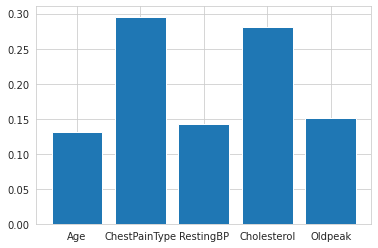

In [ ]:
from matplotlib import pyplot as plt

for feature, importance in zip(Features, clf.feature_importances_):
    print("{}:{}".format(feature, importance))

plt.bar(Features, clf.feature_importances_)

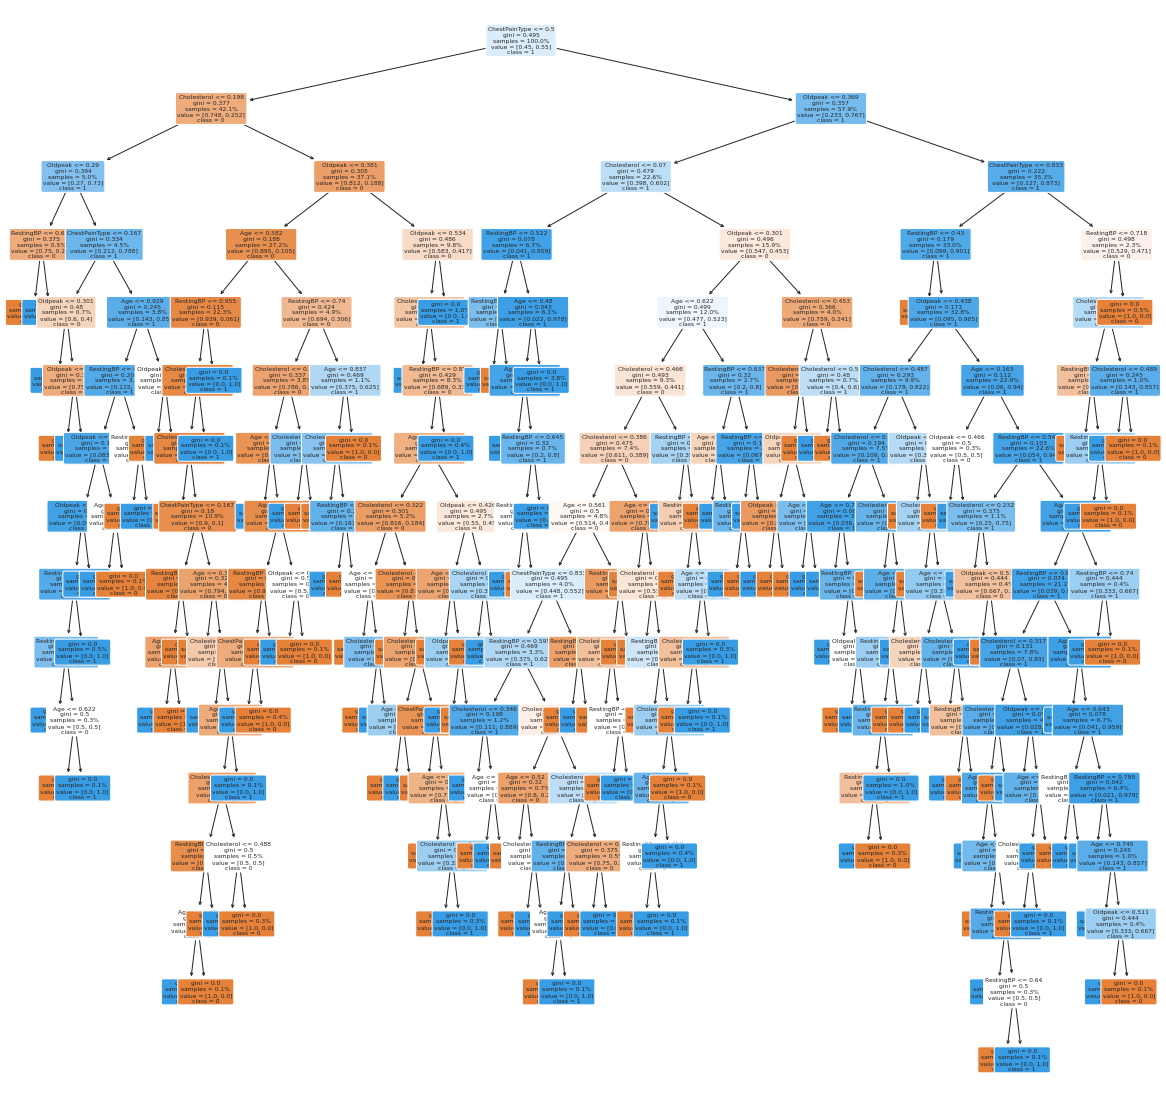

In [ ]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

# feature labels
features_label = (heart_df.drop(['HeartDisease',"MaxHR","Sex","FastingBS","RestingECG","ExerciseAngina","ST_Slope"],axis=1)).columns

# class label
class_label = ['0','1']

plt.figure(figsize=(20,20))
plot_tree(
    clf, 
    feature_names = features_label,
    class_names = class_label, 
    filled=True, 
    proportion = True,
    fontsize=6, 
    rounded = True)

plt.savefig('filename.png')

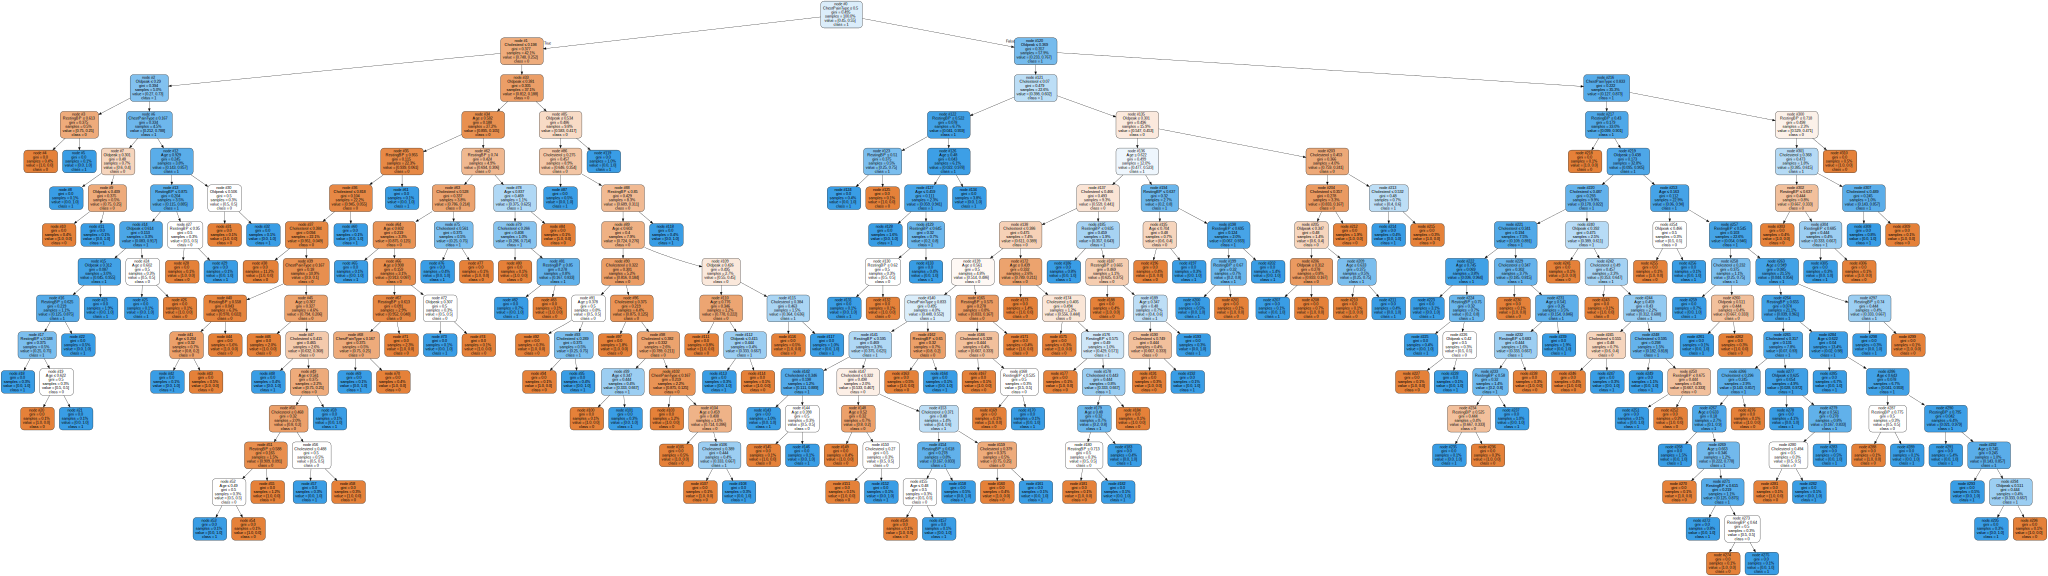

In [ ]:
import pydot
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz( 
         clf, 
         out_file = None,
         feature_names = features_label,
         class_names = class_label,  
         filled = True, 
         rounded = True,
         proportion = True,
         node_ids = True,
         rotate  =False,
         label = 'all',
         special_characters = True
        )  
graph = graphviz.Source(dot_data)  
graph

In [ ]:

def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_samples_split
          ,min_samples_leaf=min_samples_leaf
    )
    estimator.fit(X_train, y_train)

    print('Ein: %0.4f' % (1 - accuracy_score(y_train, estimator.predict(X_train))))
    print('Eout: %0.4f' % (1 - accuracy_score(y_test, estimator.predict(X_test))))

    print(classification_report(y_test, estimator.predict(X_test)))
    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , impurity=True
      , filled = True))
    
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,10,20,30]
   , min_samples_split=(1,8)
   , min_samples_leaf=(1,20))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

grafico de impuresa, quando maior o alpha mais impuro ele é 

[0.         0.00082745 0.00083908 0.00113572 0.00136286 0.00136286
 0.00136286 0.00141965 0.00146021 0.00147643 0.00151429 0.00154133
 0.00157753 0.00159001 0.00161735 0.00162245 0.00162245 0.00164048
 0.00166099 0.00170358 0.00187853 0.00204429 0.00218407 0.00227144
 0.00227144 0.0024547  0.00246684 0.00247019 0.00255537 0.00260569
 0.00262089 0.00263864 0.00280975 0.00302858 0.00302858 0.00318001
 0.0035018  0.0036343  0.00365052 0.00425724 0.00434615 0.00435899
 0.00454287 0.00463752 0.00564251 0.00584118 0.00606347 0.00638219
 0.00793364 0.01163754 0.02162943 0.02279713 0.12947279]
[0.         0.00330981 0.00666611 0.01007326 0.01552471 0.01825044
 0.02097616 0.02381546 0.02527567 0.02822853 0.03125712 0.04358777
 0.04674282 0.04992283 0.06286162 0.06772899 0.0742188  0.07749977
 0.08414372 0.0858473  0.09336141 0.09744999 0.09963407 0.10190551
 0.10417694 0.11154104 0.11647471 0.12635546 0.12891083 0.14715063
 0.1550133  0.16556786 0.1683776  0.17140619 0.17746335 0.18382337
 0.19

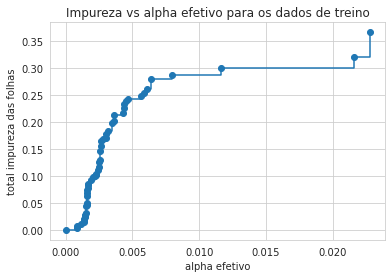

In [ ]:
#Divide os dados em treino e validação 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

#Recupera os valores efetivos de alpha para a elaboração da fase de prunning
path = clf.cost_complexity_pruning_path(X_train, y_train) #pegando candidatos - > caminho de poda
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#Plota a relação entre os valores de alpha e impureza das folhas
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("alpha efetivo")
ax.set_ylabel("total impureza das folhas")
ax.set_title("Impureza vs alpha efetivo para os dados de treino")
fig.show()

print(ccp_alphas)
print(impurities)

treinando todos os alphas pra uma futura validação

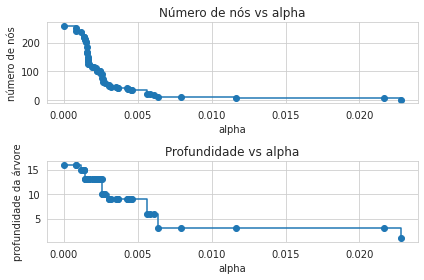

In [ ]:
clfs = [] #
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

#Descarta o último por ser trivial (apenas o nó raiz)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("número de nós")
ax[0].set_title("Número de nós vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("profundidade da árvore")
ax[1].set_title("Profundidade vs alpha")
fig.tight_layout()

sempre que o alpha cresce, os nos e as complexidades diminuem, logo a profundidade tambem é penalizada

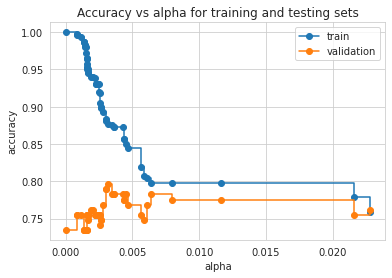

0.02279712970189518


In [ ]:
import matplotlib.pyplot as plt

train_scores = [clf.score(X_train, y_train) for clf in clfs]
val_scores = [clf.score(X_val, y_val) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

best_acc = 0
for v,i in zip(val_scores, range(len(val_scores))):
  if best_acc < v:
    v = best_acc
    best_alpha = clfs[i].ccp_alpha

print(best_alpha)

Ein: 0.2419
Eout: 0.2663
              precision    recall  f1-score   support

           0       0.73      0.61      0.67        80
           1       0.74      0.83      0.78       104

    accuracy                           0.73       184
   macro avg       0.73      0.72      0.72       184
weighted avg       0.73      0.73      0.73       184



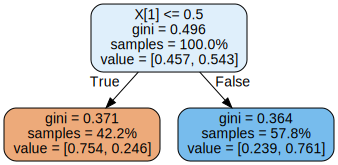

<Figure size 3600x1440 with 0 Axes>

In [ ]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
clf.fit(X_train, y_train)

print('Ein: %0.4f' % (1 - accuracy_score(y_train, clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf.predict(X_test))))
print(classification_report(y_test, clf.predict(X_test)))

#Desenho da árvore
plt.figure(figsize=(50,20))
graph = Source(export_graphviz(
    clf,
    filled=True, 
    proportion = True,
    out_file=None,
    rounded = True))
display(SVG(graph.pipe(format='svg')))

plt.show()

outro procedimento, para validação, utilizando o GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

clf = DecisionTreeClassifier(random_state=21)
path = clf.cost_complexity_pruning_path(X_train, y_train) #alphas

param_grid = {'ccp_alpha': path.ccp_alphas}

CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 7, verbose=2, n_jobs=-1)
CV_clf.fit(X_train, y_train)


print('Ein: %0.4f' % (1 - accuracy_score(y_train, CV_clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, CV_clf.predict(X_test))))
print(classification_report(y_test, CV_clf.predict(X_test)))

Fitting 7 folds for each of 66 candidates, totalling 462 fits
Ein: 0.1676
Eout: 0.2174
              precision    recall  f1-score   support

           0       0.72      0.78      0.75        76
           1       0.83      0.79      0.81       108

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.79      0.78      0.78       184



### SVM


In [ ]:
svm_ = svm.SVC(kernel='rbf')

# Create the random grid
param_grid = {
              'C' : np.linspace(1,10,20),
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5] 
              }

CV_rf = GridSearchCV(estimator=svm_, param_grid=param_grid, cv = 5, verbose=2, n_jobs=-1)


# Fit the random search model
CV_rf.fit(X_train, y_train)

print(CV_rf.best_estimator_)
# print(CV_rf.best_params_)


print('Ein: %0.4f' % (1 - accuracy_score(y_train, CV_rf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, CV_rf.predict(X_test))))
print(classification_report(y_test, CV_rf.predict(X_test)))

Fitting 5 folds for each of 160 candidates, totalling 800 fits
SVC(C=8.578947368421051, gamma=0.05)
Ein: 0.1894
Eout: 0.2391
              precision    recall  f1-score   support

           0       0.72      0.70      0.71        76
           1       0.79      0.81      0.80       108

    accuracy                           0.76       184
   macro avg       0.75      0.75      0.75       184
weighted avg       0.76      0.76      0.76       184



### Rede Neural

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=20, test_size=0.2, shuffle=True)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=5, kernel_initializer='normal', activation='tanh'))
model.add(tf.keras.layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))


# Compilar o modelo
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                72        
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________
None


### Treinando modelo


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=54, validation_data=(X_test, y_test))

Epoch 1/100
14/14 [==============================] - 1s 17ms/step - loss: 0.6950 - accuracy: 0.4019 - val_loss: 0.6944 - val_accuracy: 0.4293
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.4796 - val_loss: 0.6931 - val_accuracy: 0.4783
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5286 - val_loss: 0.6917 - val_accuracy: 0.5380
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6904 - accuracy: 0.5531 - val_loss: 0.6904 - val_accuracy: 0.5380
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6889 - accuracy: 0.5559 - val_loss: 0.6891 - val_accuracy: 0.5380
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6874 - accuracy: 0.5559 - val_loss: 0.6878 - val_accuracy: 0.5380
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6859 - accuracy: 0.5572 - val_loss: 0.6865 - val_accuracy: 0.5380
Epoch 8/100


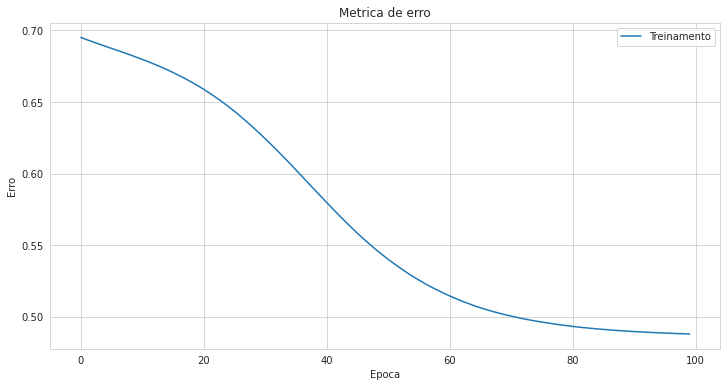

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

y_pred = model.predict(X_test)

for i in range(len(y_pred)):
  if y_pred[i,0] >= 0.5:
    y_pred[i,0] = 1

  else:
    y_pred[i,0] = 0

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78        85
           1       0.78      0.91      0.84        99

    accuracy                           0.82       184
   macro avg       0.83      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184



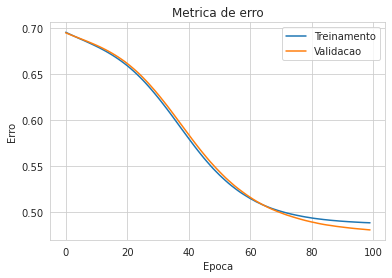

--> Acuracia (train): 0.7725
--> Acuracia (test): 0.8152


In [ ]:
from keras.layers import Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_test))
pred_train = np.round(model.predict(X_train))

print(f'--> Acuracia (train): {accuracy_score(y_train, pred_train):.4f}')
print(f'--> Acuracia (test): {accuracy_score(y_test, pred):.4f}')


## Salvando o modelo e os pesos

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")

In [ ]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = tf.keras.models.model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")

loaded_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)

In [ ]:
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 81.52%


In [ ]:
print('Ein: %0.4f' % (1 - loaded_model.evaluate(X_train, y_train, verbose=0)[1]))
print('Eout: %0.4f' % (1 - loaded_model.evaluate(X_test, y_test, verbose=0)[1]))

Ein: 0.2275
Eout: 0.1848
